# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/thanhdatho0/BTL_Data_Mining/main/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [52]:
# set index cho dataset bằng thuộc tính user_id
df.set_index(df.user_id, inplace=True)
df.drop('user_id', inplace=True, axis=1) # drop cột user_id
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
user_id,,,,,,,,,,,
1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


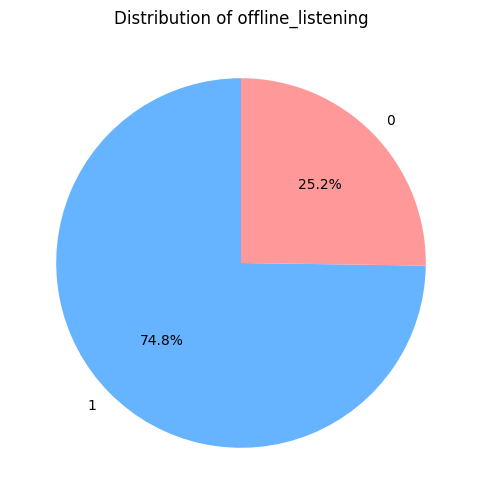

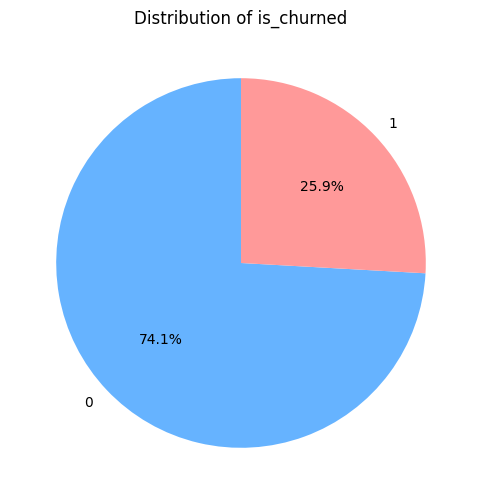

In [53]:
# --- 2. Biểu đồ dữ liệu nhị phân ---
binary_cols = ['offline_listening', 'is_churned']

for col in binary_cols:
    plt.figure(figsize=(6,6))  # Vuông để pie chart đẹp
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',  # Hiển thị tỉ lệ %
        startangle=90,      # Bắt đầu từ góc 90 độ
        colors=['#66b3ff','#ff9999']  # Màu sắc tùy chọn
    )
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Ẩn nhãn trục y
    plt.show()

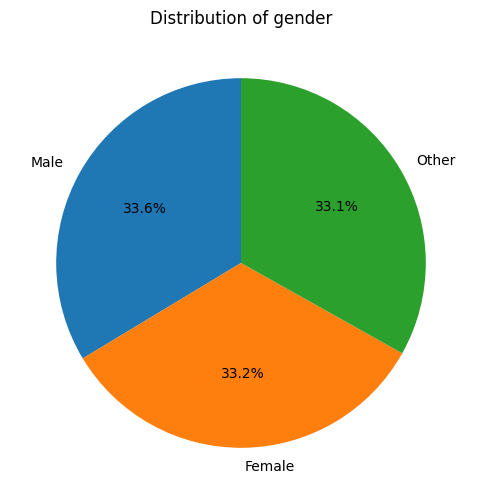

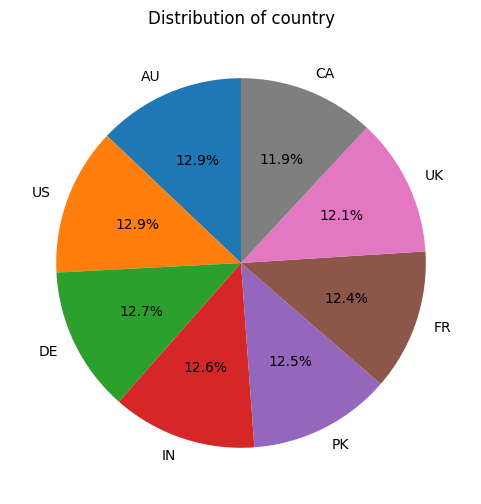

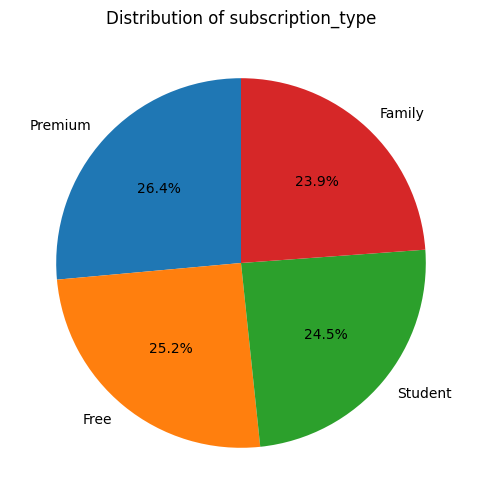

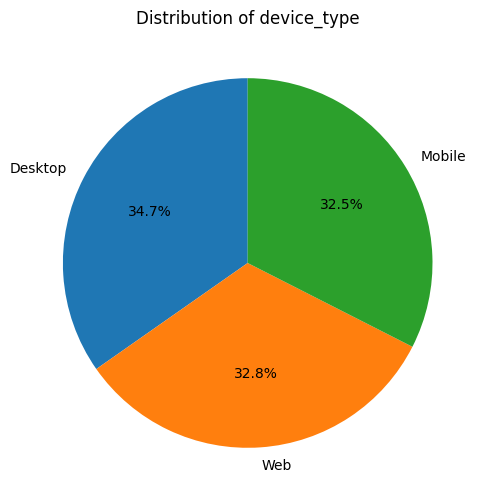

In [54]:
# --- 3. Biểu đồ dữ liệu phân loại ---
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']

for col in categorical_cols:
    # Pie chart
    plt.figure(figsize=(6,6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.ylabel('')
    plt.title(f'Distribution of {col}')
    plt.show()

# Features Classification: Categorical vs Numerical

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 750.0+ KB


In [56]:
# Thay đổi kiểu dữ liệu của target feature thành categorical, nhận 2 giá trị {0,1}
df['is_churned'] = df['is_churned'].astype('category')

# for loop chuyển đổi kiểu dữ liệu
features = ['gender', 'country', 'subscription_type', 'device_type', 'offline_listening']
for feature in features:
    df[feature] = df[feature].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 1 to 8000
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8000 non-null   category
 1   age                    8000 non-null   int64   
 2   country                8000 non-null   category
 3   subscription_type      8000 non-null   category
 4   listening_time         8000 non-null   int64   
 5   songs_played_per_day   8000 non-null   int64   
 6   skip_rate              8000 non-null   float64 
 7   device_type            8000 non-null   category
 8   ads_listened_per_week  8000 non-null   int64   
 9   offline_listening      8000 non-null   category
 10  is_churned             8000 non-null   category
dtypes: category(6), float64(1), int64(4)
memory usage: 422.9 KB


In [57]:
# Sự phân bổ của các numerical feature
df.describe()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,37.662125,154.068250,50.127250,0.300127,6.943875
std,12.740359,84.015596,28.449762,0.173594,13.617953
min,16.000000,10.000000,1.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000


In [58]:
# Sự phân bổ của các categorical feature
df.describe(include=['category'])

,gender,country,subscription_type,device_type,offline_listening,is_churned
count,8000,8000,8000,8000,8000,8000
unique,3,8,4,3,2,2
top,Male,AU,Premium,Desktop,1,0
freq,2691,1034,2115,2778,5982,5929


# Exploratory Data Analysis (EDA)

## EDA for categorical features

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

df['is_churned'].value_counts(normalize=True).to_frame()

,proportion
is_churned,
0,0.741125
1,0.258875


* Bộ dữ liệu tương đối mất cân bằng với tỉ lệ ~26/74

In [60]:
df['gender'].value_counts(normalize=True).to_frame()

,proportion
gender,
Male,0.336375
Female,0.332375
Other,0.331250


* Các giá trị trong thuộc tính age được phân bổ khá đồng đều

In [61]:
df['country'].value_counts(normalize=True).to_frame()

,proportion
country,
AU,0.129250
US,0.129000
DE,0.126875
IN,0.126375
PK,0.124875
FR,0.123625
UK,0.120750
CA,0.119250


* Các giá trị trong thuộc tính country được phân bổ khá đồng đều

In [62]:
df['subscription_type'].value_counts(normalize=True).to_frame()

,proportion
subscription_type,
Premium,0.264375
Free,0.252250
Student,0.244875
Family,0.238500


* Sự phân bố giá trị ở thuộc tính subscription_type có sự chênh lệch nhưng không đáng kể

In [63]:
df['device_type'].value_counts(normalize=True).to_frame()

,proportion
device_type,
Desktop,0.347250
Web,0.327875
Mobile,0.324875


* Sự phân bố giá trị của thuộc tính dedive_type khá đồng đều, có hơi nhiều hơn về phía Desktop nhưng nhìn chung không đáng kể

In [64]:
df['offline_listening'].value_counts(normalize=True).to_frame()

,proportion
offline_listening,
1,0.74775
0,0.25225


* Sự phân bố giá trị của thuộc tính offline_listening có sự chênh lệch rõ ràng với tỉ lệ 25(0)/75(1)

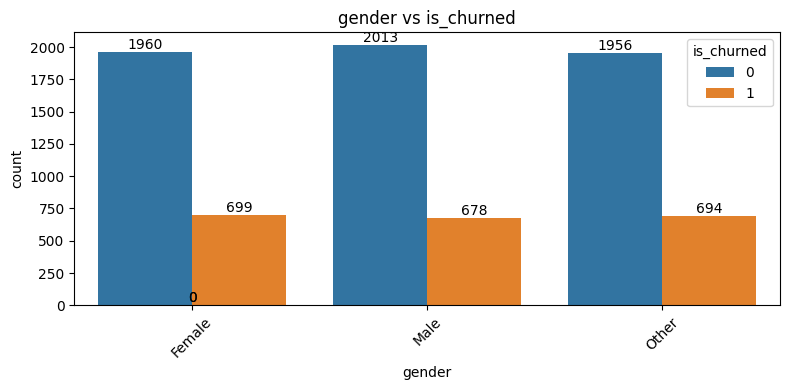

--------------


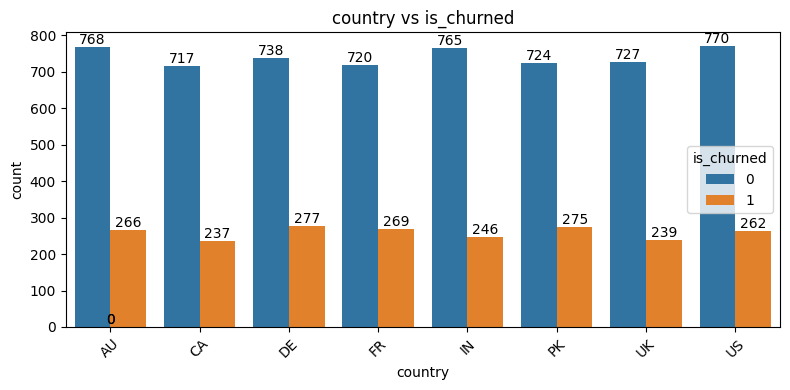

--------------


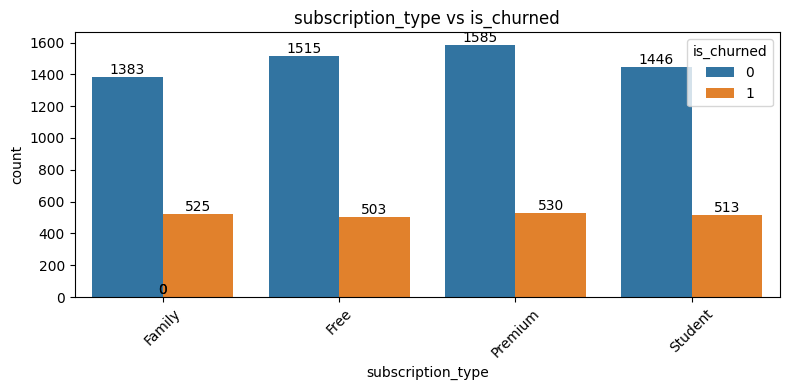

--------------


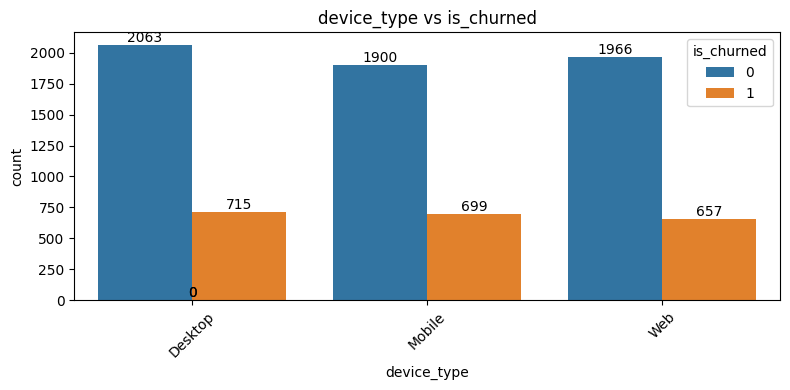

--------------


In [65]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=col, hue='is_churned', data=df)

    # Vẽ số lượng trực tiếp trên từng cột
    n_hue = len(df['is_churned'].unique())  # =2
    for i, p in enumerate(ax.patches):
        height = p.get_height()  # chính là số lượng
        ax.annotate(f'{int(height)}',  # in ra số lượng nguyên
                    (p.get_x() + p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'{col} vs is_churned')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("--------------")

## EDA for numerical features

<Axes: xlabel='age', ylabel='Count'>

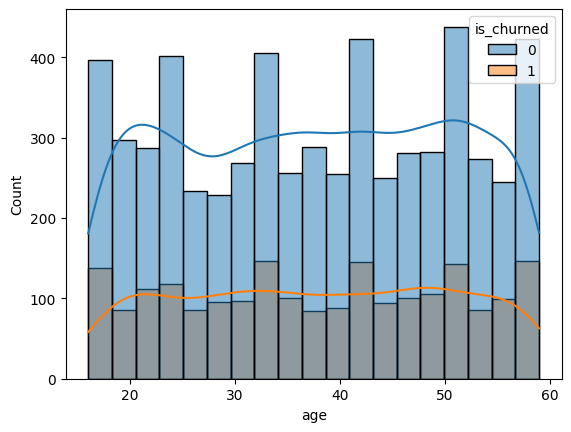

In [66]:
sns.histplot(x="age", hue='is_churned', data=df, kde=True)

<Axes: xlabel='listening_time', ylabel='Count'>

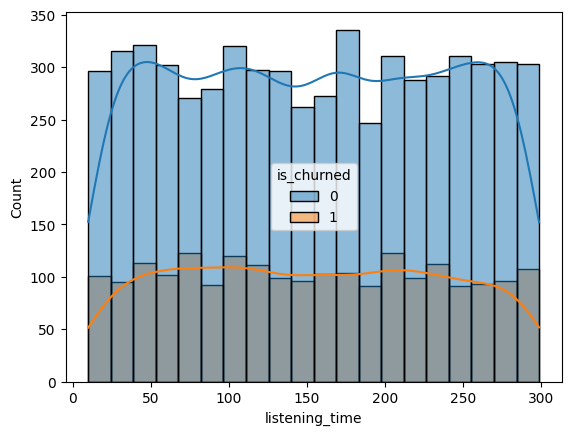

In [67]:
sns.histplot(x="listening_time", hue='is_churned', data=df, kde=True)

<Axes: xlabel='songs_played_per_day', ylabel='Count'>

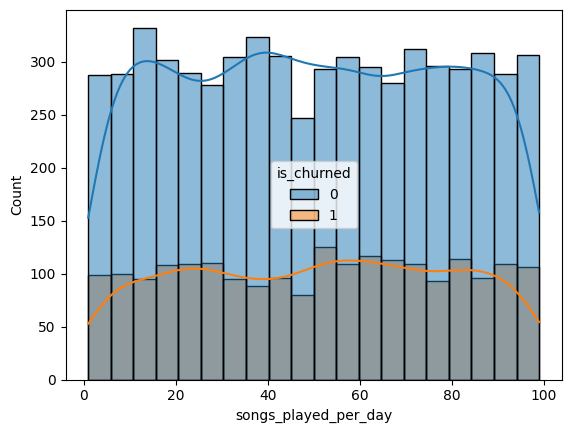

In [68]:
sns.histplot(x="songs_played_per_day", hue='is_churned', data=df, kde=True)

<Axes: xlabel='skip_rate', ylabel='Count'>

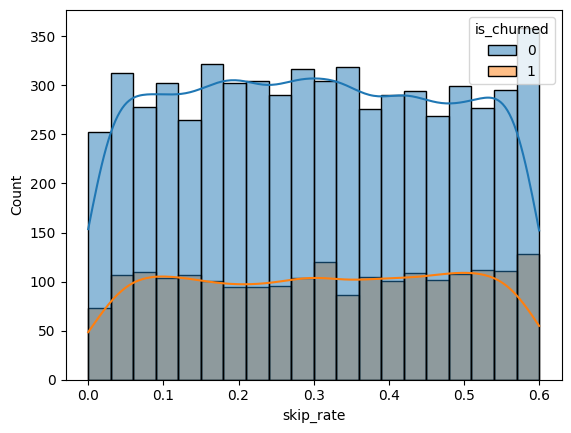

In [69]:
sns.histplot(x="skip_rate", hue='is_churned', data=df, kde=True)

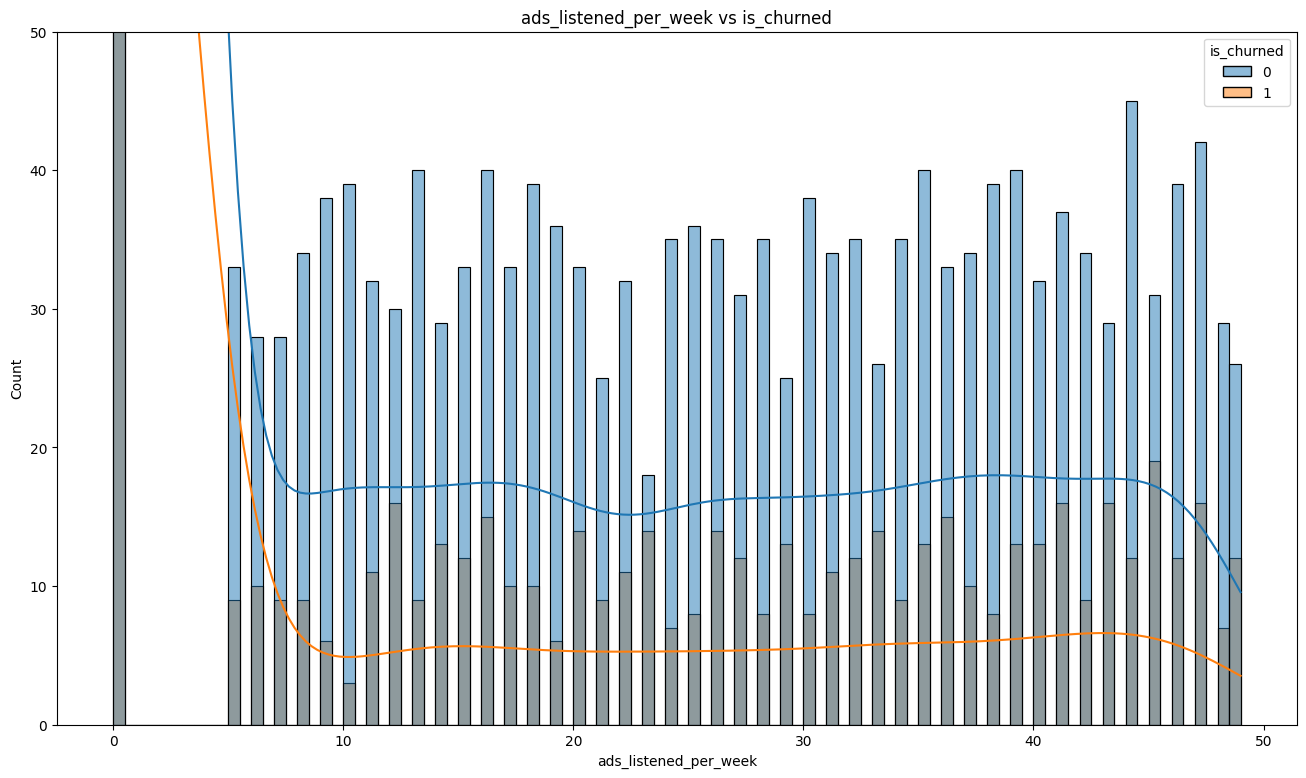

In [70]:
# sns.histplot(x="ads_listened_per_week", hue='is_churned', data=df, kde=True)
plt.figure(figsize=(16,9))
sns.histplot(x="ads_listened_per_week", hue='is_churned', data=df, kde=True)

plt.ylim(0, 50)  # giới hạn trục y từ 0 đến 100
plt.title("ads_listened_per_week vs is_churned")
plt.show()

# Feature Engineering & Data Wrangling


# Feature Engineering

In [71]:
print(df.groupby('subscription_type')['ads_listened_per_week'].describe())

                    count      mean        std  min   25%   50%   75%   max
subscription_type                                                          
Family             1908.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0
Free               2018.0  27.52775  12.982368  5.0  16.0  28.0  39.0  49.0
Premium            2115.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0
Student            1959.0   0.00000   0.000000  0.0   0.0   0.0   0.0   0.0


In [72]:
df['ads_listened_per_week_fequences'] = pd.cut(df['ads_listened_per_week'], bins=[-1,4,20,35,50], labels=['Never', 'Sometimes', 'Often', 'Always'])

In [73]:
df['ads_listened_per_week_fequences']

,ads_listened_per_week_fequences
user_id,
1,Often
2,Never
3,Never
4,Never
5,Never
...,...
7996,Never
7997,Never
7998,Sometimes


<Axes: xlabel='ads_listened_per_week_fequences', ylabel='Count'>

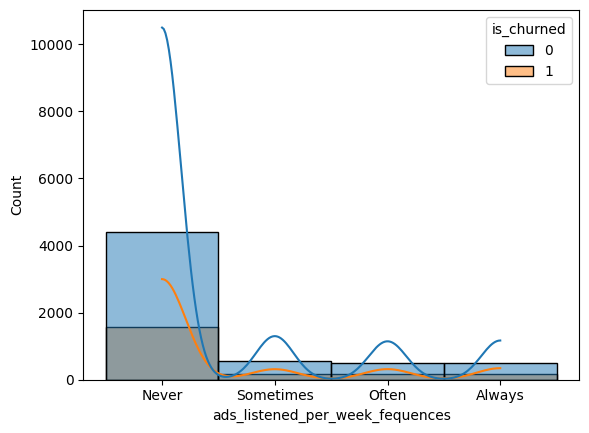

In [74]:
sns.histplot(x="ads_listened_per_week_fequences", hue='is_churned', data=df, kde=True)

# Data Wrangling

In [75]:
num_features = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week']
cat_features = ['gender', 'country', 'ads_listened_per_week_fequences', 'subscription_type', 'device_type', 'offline_listening']

dataset_dummy = pd.get_dummies(df, columns=cat_features, drop_first=True)
dataset_dummy.head()

,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,is_churned,gender_Male,gender_Other,country_CA,country_DE,...,country_US,ads_listened_per_week_fequences_Sometimes,ads_listened_per_week_fequences_Often,ads_listened_per_week_fequences_Always,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web,offline_listening_1
user_id,,,,,,,,,,,,,,,,,,,,,
1,54,26,23,0.20,31,1,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
2,33,141,62,0.34,0,0,False,True,False,True,...,False,False,False,False,False,False,False,False,True,True
3,38,199,38,0.04,0,1,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,22,36,2,0.31,0,0,False,False,True,False,...,False,False,False,False,False,False,True,True,False,True
5,29,250,57,0.36,0,1,False,True,False,False,...,True,False,False,False,False,False,False,True,False,True


<Axes: >

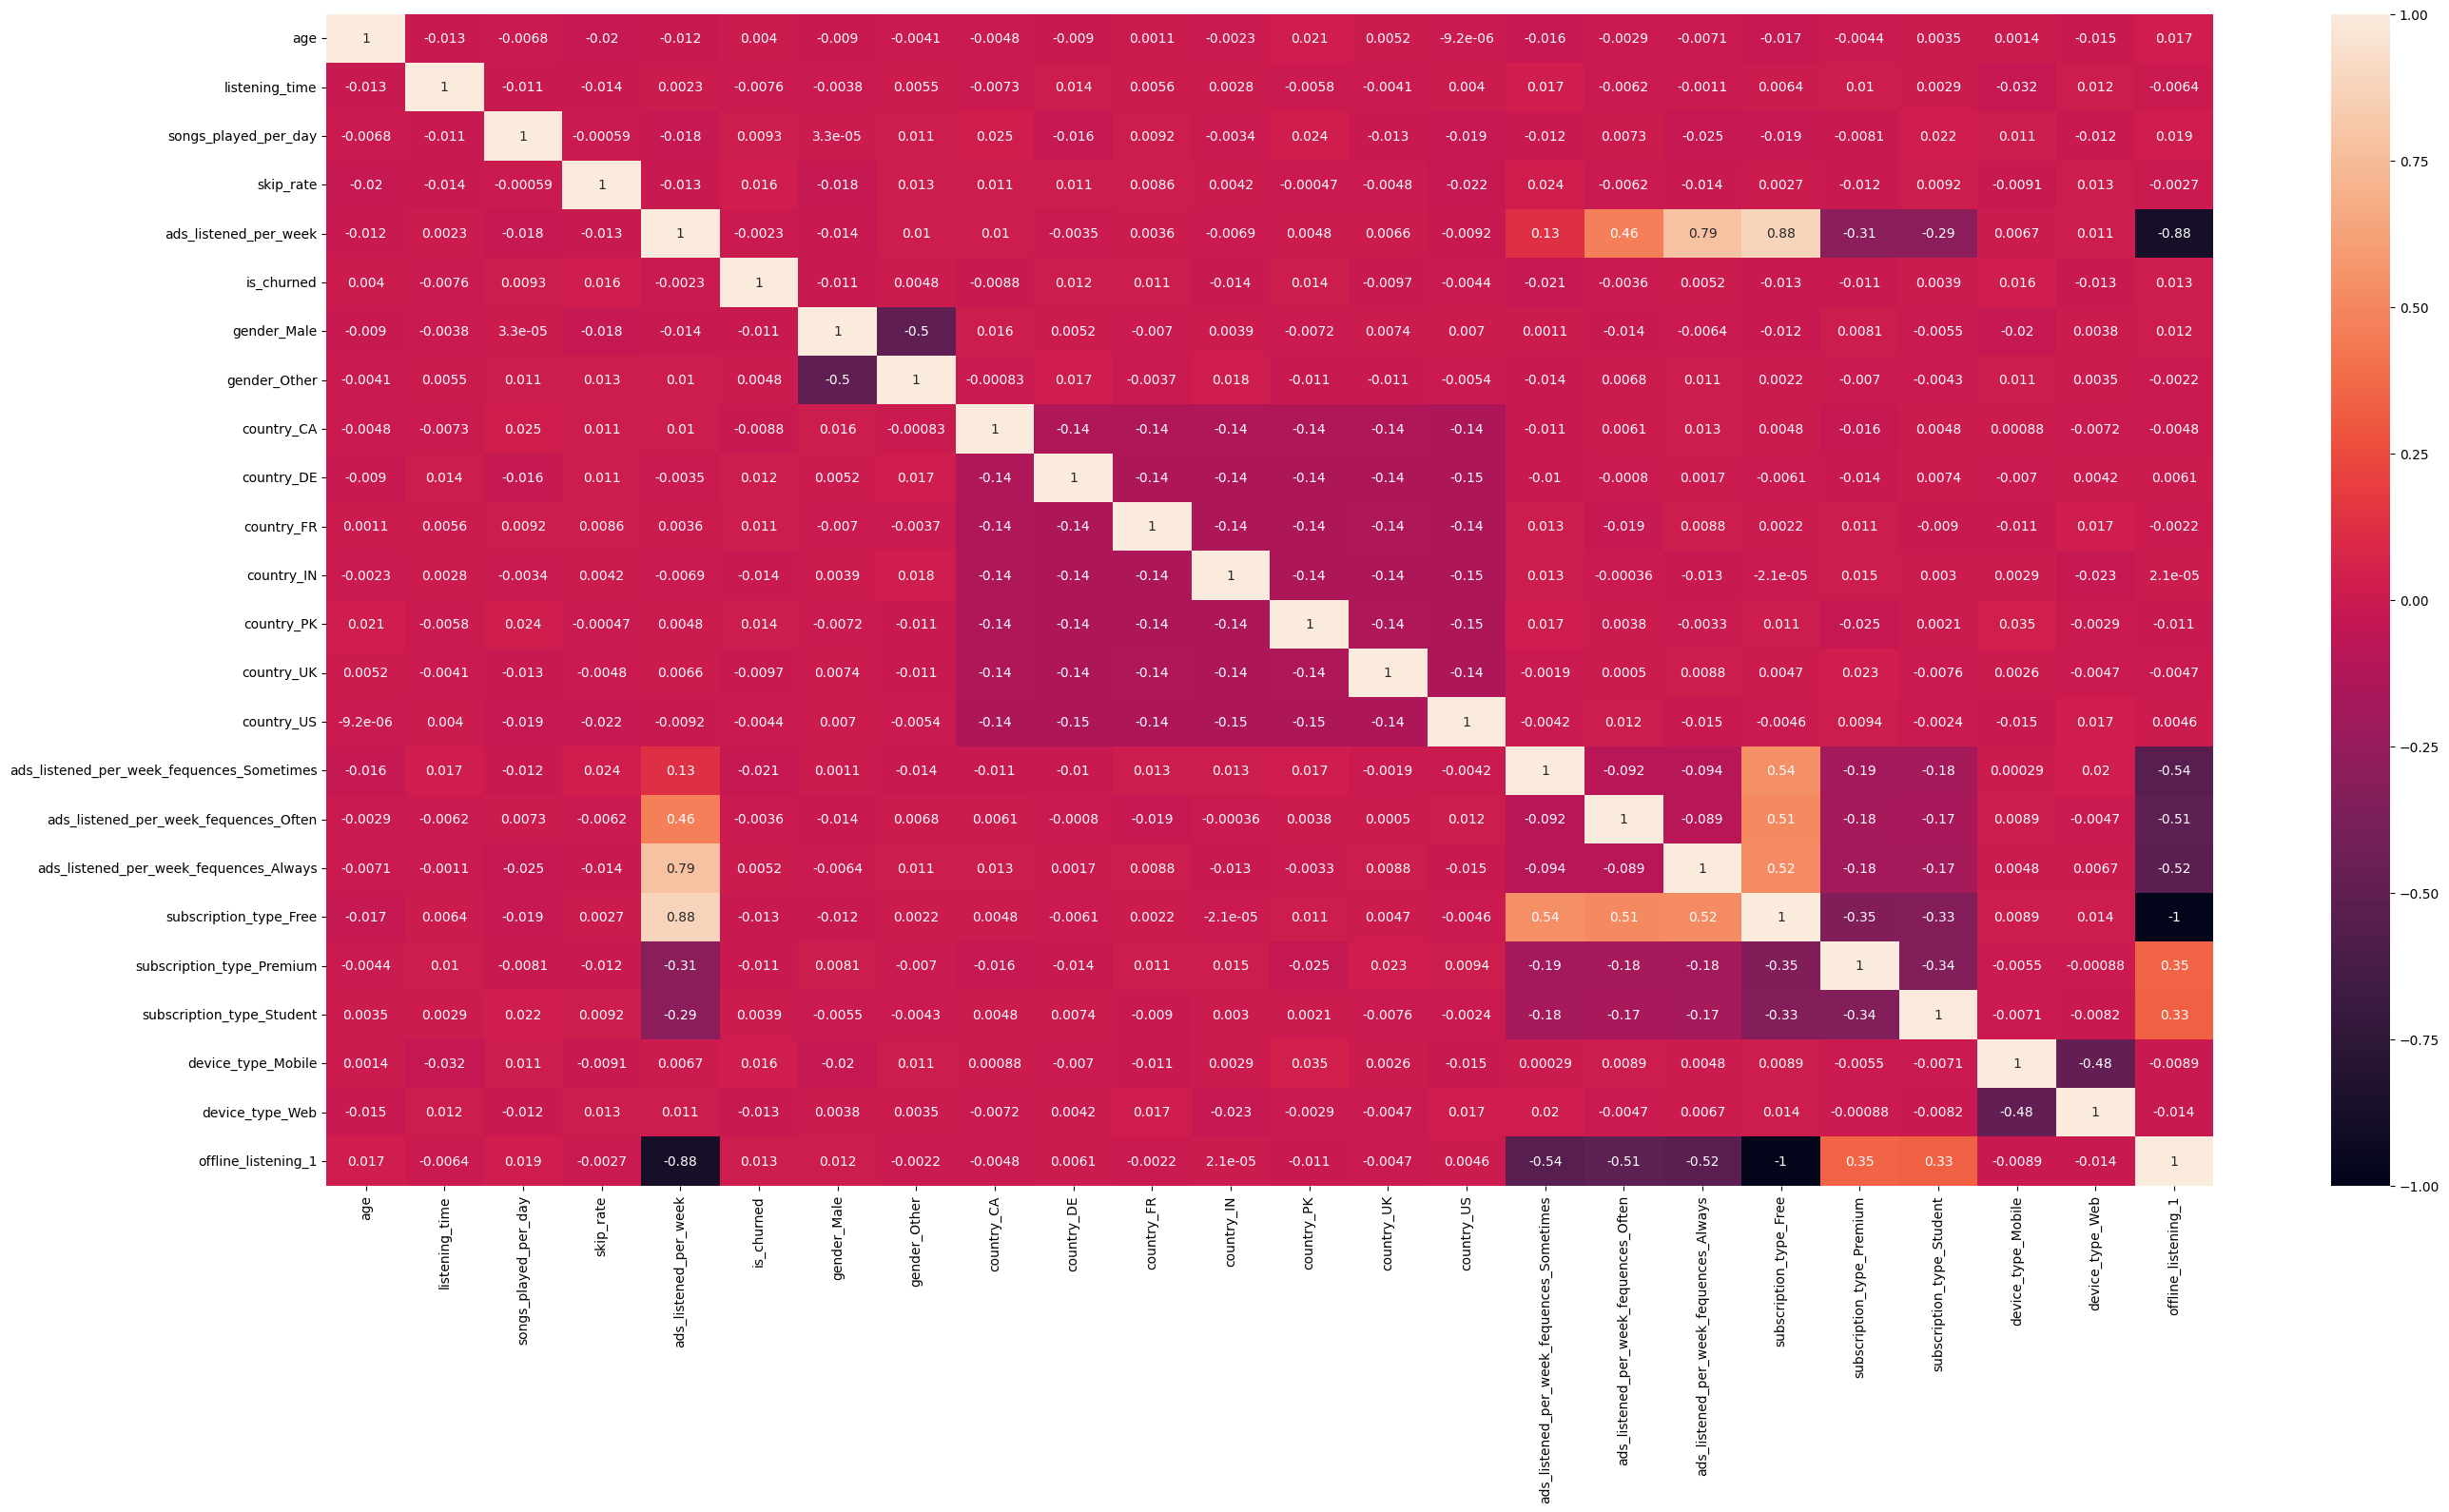

In [76]:
plt.figure(figsize=(32, 16))
sns.heatmap(dataset_dummy.corr(method='pearson'), annot=True)

In [77]:
drop_features = ['offline_listening_1', 'ads_listened_per_week']

def drop_cols(df, features):
  return df.drop(columns=drop_features, errors='ignore')

dataset_dummy = drop_cols(dataset_dummy, drop_features)

num_features = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate']
cat_features = ['gender', 'country', 'ads_listened_per_week_fequences', 'subscription_type', 'device_type']

feature_cols = num_features + cat_features
print(feature_cols)

['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'gender', 'country', 'ads_listened_per_week_fequences', 'subscription_type', 'device_type']


<Axes: >

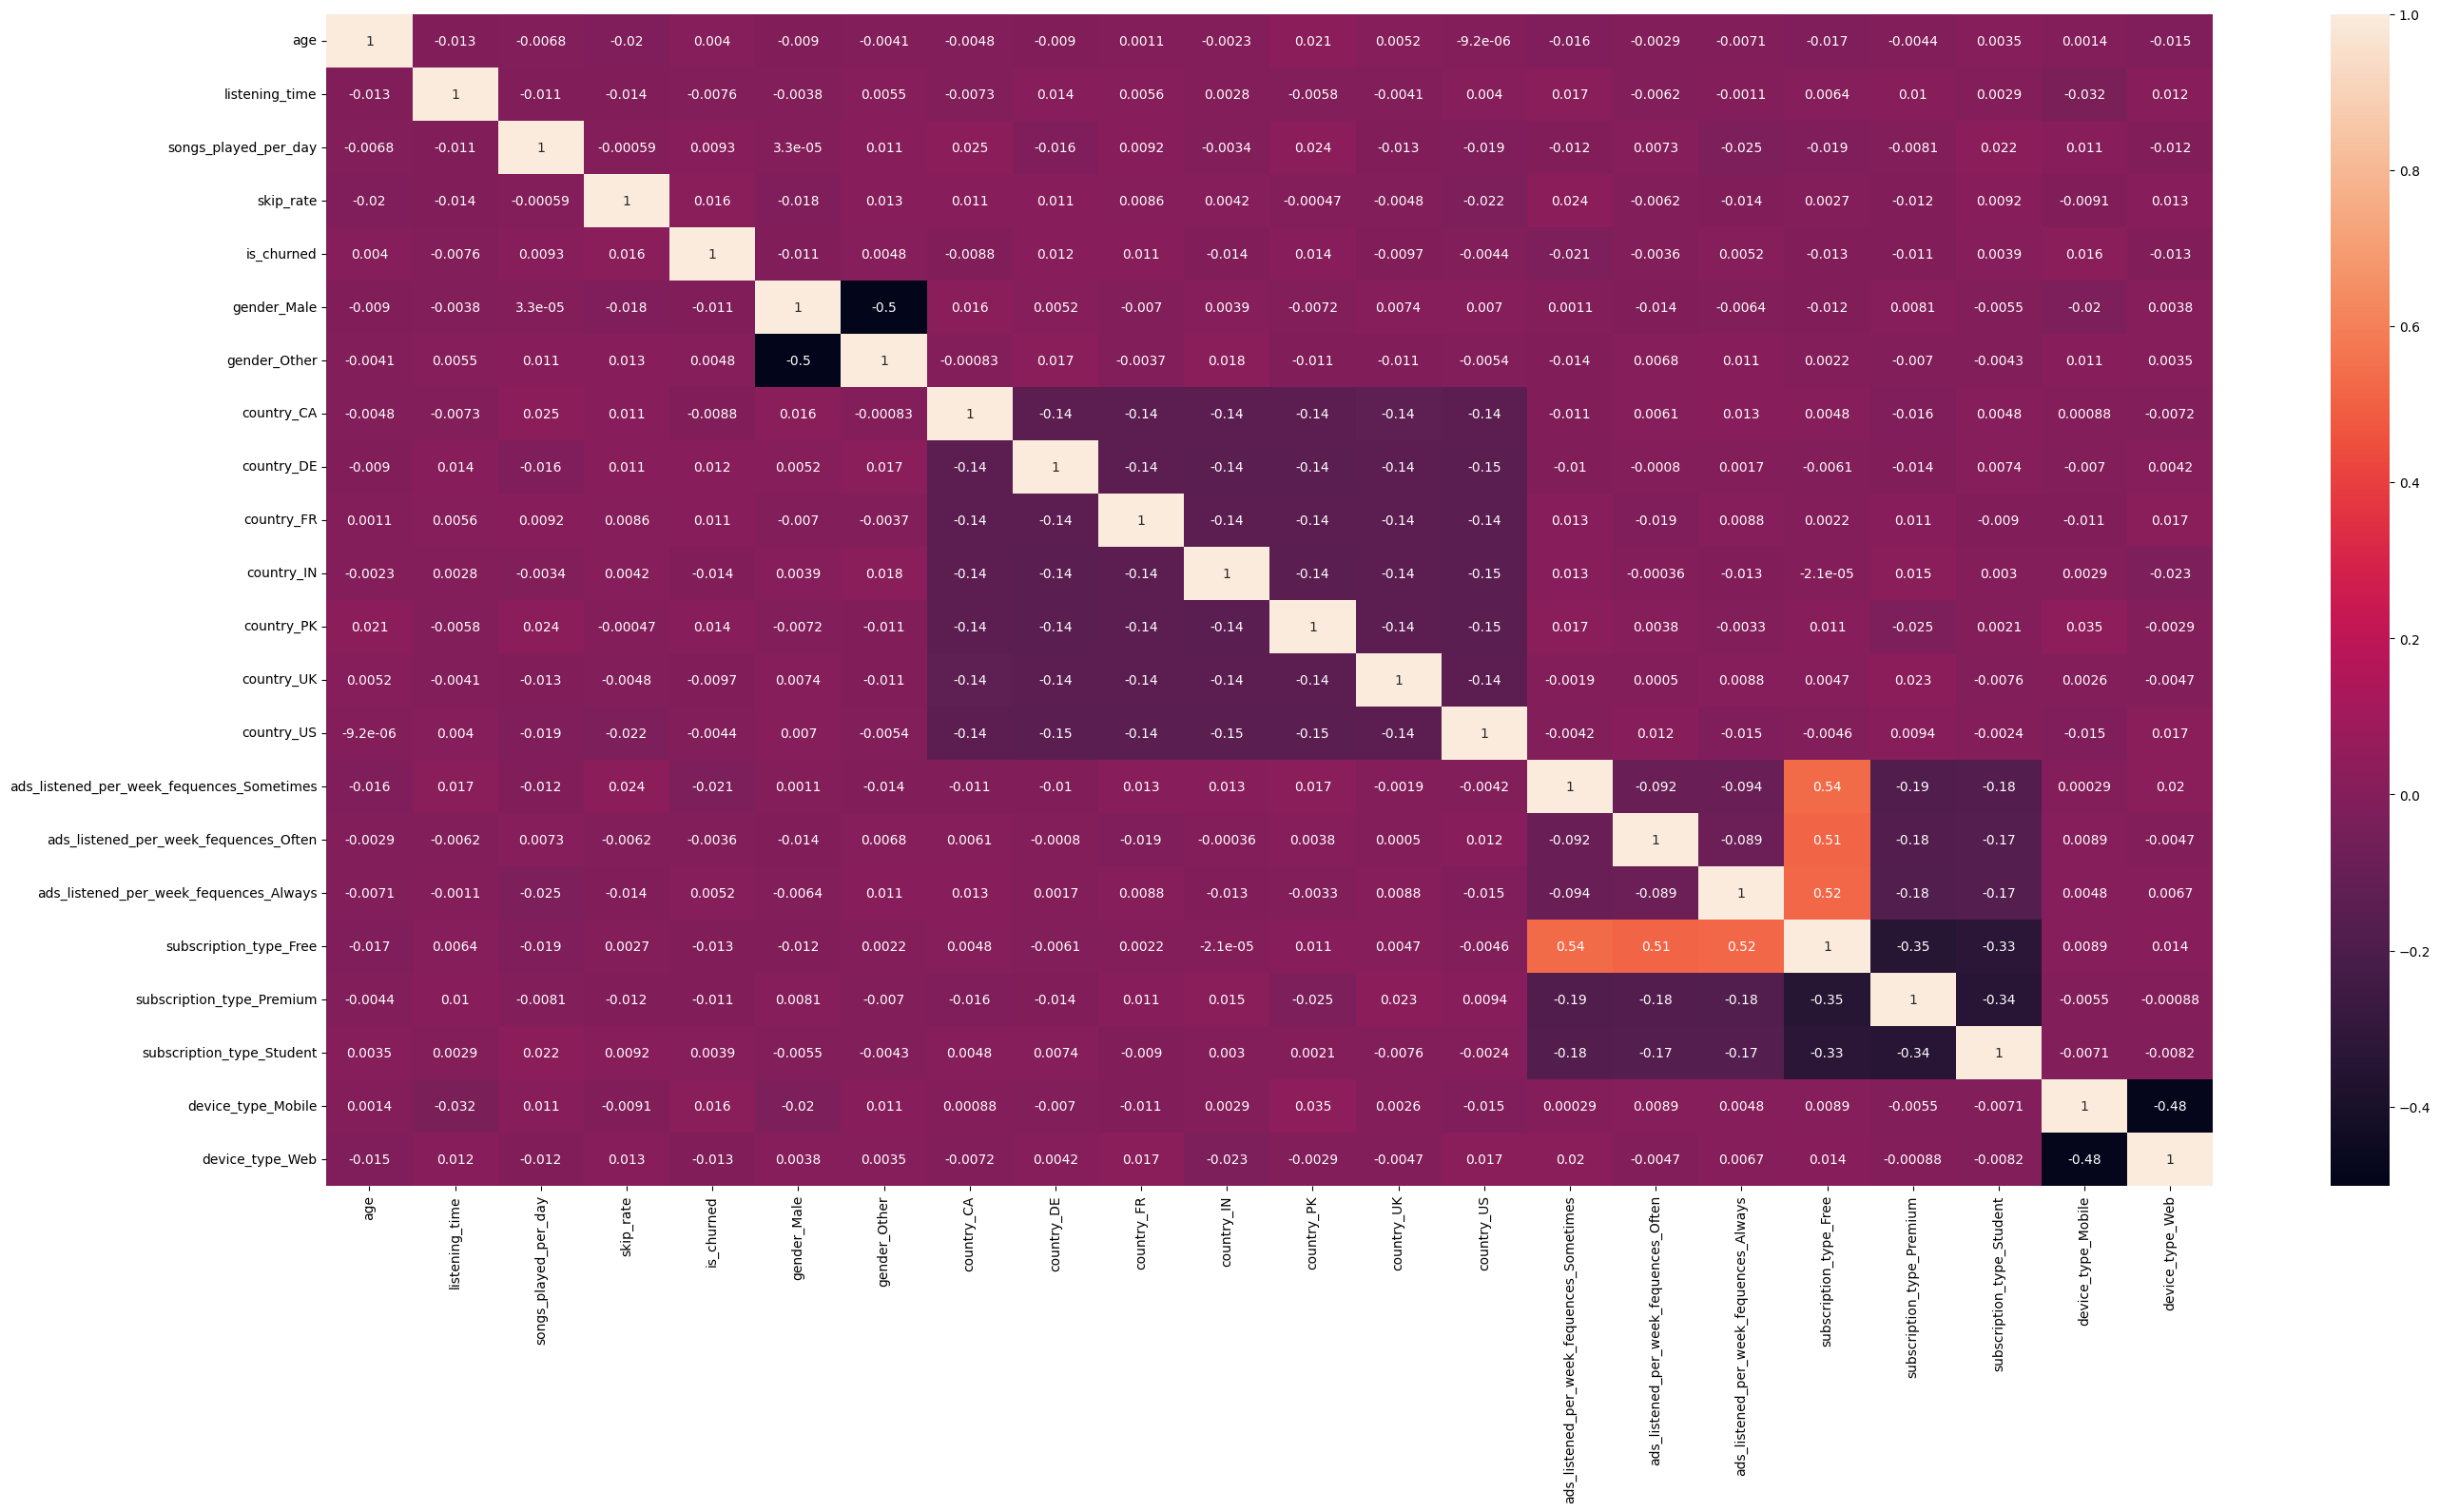

In [78]:
plt.figure(figsize=(32, 16))
sns.heatmap(dataset_dummy.corr(method='pearson'), annot=True)

In [79]:
import umap
import plotly.express as px
import pandas as pd


emb_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(dataset_dummy)

px.scatter_3d(
    emb_3d,
    x=0,
    y=1,
    z=2,
    color=dataset_dummy['is_churned'].astype(str),           # Thay labels → cột is_churned
    color_discrete_map={"0": "#00CC96", "1": "#EF553B"},     # Xanh lá = không churn, Đỏ = churn
    labels={"color": "Churn"},
    title="<b>Phân bố khách hàng trong không gian 3D – UMAP</b><br><sup>Màu đỏ = Có nguy cơ rời bỏ (Churn), Màu xanh = Giữ chân tốt</sup>",
    width=1000,
    height=800,
    opacity=0.8
).update_traces(marker=dict(size=4, line=dict(width=0.5, color='white')))

Kiểm tra giá trị thiếu

In [80]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count = df[col].isnull().sum()
    if(missing_count > 0):
      print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values")

display_missing(df, feature_cols)

* Không có missing values

# Model Training

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

dataset_dummy.head()

,age,listening_time,songs_played_per_day,skip_rate,is_churned,gender_Male,gender_Other,country_CA,country_DE,country_FR,...,country_UK,country_US,ads_listened_per_week_fequences_Sometimes,ads_listened_per_week_fequences_Often,ads_listened_per_week_fequences_Always,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
user_id,,,,,,,,,,,,,,,,,,,,,
1,54,26,23,0.20,1,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
2,33,141,62,0.34,0,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,38,199,38,0.04,1,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,22,36,2,0.31,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
5,29,250,57,0.36,1,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [82]:
X = dataset_dummy.drop('is_churned', axis=1)
y = dataset_dummy['is_churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Features (X):", X.shape)
print("Target (y):", y.shape)

Features (X): (8000, 21)
Target (y): (8000,)


In [83]:
scaler = MinMaxScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [84]:
pd.DataFrame(X_train).head()

,age,listening_time,songs_played_per_day,skip_rate,gender_Male,gender_Other,country_CA,country_DE,country_FR,country_IN,...,country_UK,country_US,ads_listened_per_week_fequences_Sometimes,ads_listened_per_week_fequences_Often,ads_listened_per_week_fequences_Always,subscription_type_Free,subscription_type_Premium,subscription_type_Student,device_type_Mobile,device_type_Web
user_id,,,,,,,,,,,,,,,,,,,,,
4662,0.744186,0.442907,0.377551,0.983333,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
5196,0.651163,0.235294,0.357143,0.266667,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
7124,0.302326,0.276817,0.755102,0.866667,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3765,0.930233,0.363322,0.408163,0.333333,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6825,0.372093,0.328720,0.163265,0.283333,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


# Imbalance Processing

In [85]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Over Sampling
X_randomOver_res, y_randomOver_res = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)
X_smote_res, y_smote_res = SMOTE(random_state=42, k_neighbors=5).fit_resample(X_train, y_train)

# Under Sampling
X_randomUnder_res, y_randomUnder_res = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
X_nearMiss_res, y_nearMiss_res = NearMiss(n_neighbors=5).fit_resample(X_train, y_train)

# Các thuật toán khai phá dữ liệu có thể áp dụng

In [86]:
# Import thư viện
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import warnings
warnings.filterwarnings("ignore")

## RandomForest

Test ROC-AUC 0.5000
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600



Text(0.5, 1.0, 'Confusion Matrix')

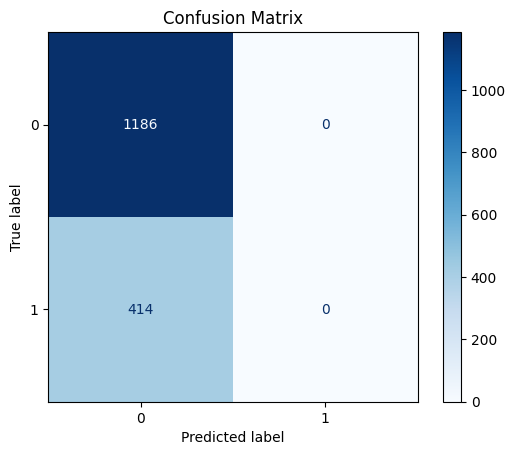

In [87]:
random_forest_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=2,
    class_weight=None)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## GradientBoosting

Test ROC-AUC 0.5094

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1186
           1       0.27      0.26      0.27       414

    accuracy                           0.63      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.62      0.63      0.63      1600



Text(0.5, 1.0, 'Confusion Matrix')

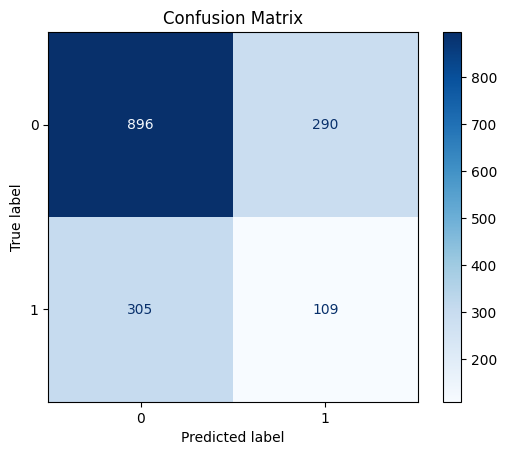

In [88]:
radient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=7,
    n_estimators=200,
    subsample=1.0)

radient_boosting_model.fit(X_randomOver_res, y_randomOver_res)

y_pred = radient_boosting_model.predict(X_test)
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=radient_boosting_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

## XGBoost

Test ROC-AUC 0.5037

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1186
           1       0.30      0.04      0.07       414

    accuracy                           0.73      1600
   macro avg       0.52      0.50      0.45      1600
weighted avg       0.63      0.73      0.64      1600



Text(0.5, 1.0, 'Confusion Matrix')

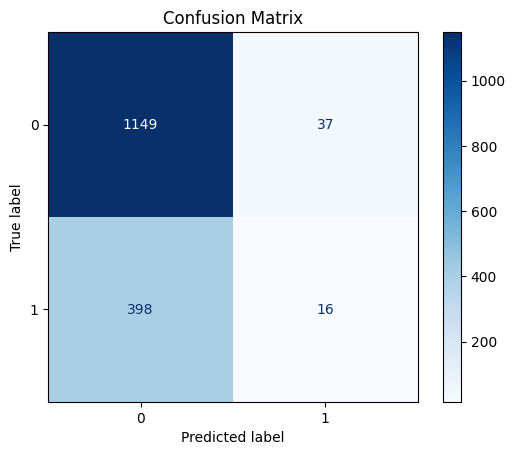

In [89]:
XGB_model = XGBClassifier(
    learning_rate=0.05,
    max_depth=7,
    n_estimators=200,
    subsample=1.0)

XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

Test ROC-AUC 0.5000

Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1186
           1       0.00      0.00      0.00       414

    accuracy                           0.74      1600
   macro avg       0.37      0.50      0.43      1600
weighted avg       0.55      0.74      0.63      1600



Text(0.5, 1.0, 'Confusion Matrix')

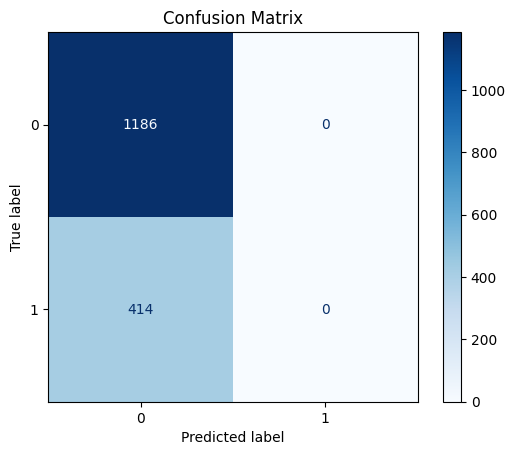

In [90]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='newton-cg', max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
print(f"Test ROC-AUC {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')